LWR Mean Squared Error on Diabetes Dataset: 2618.01487879261
KNN Mean Squared Error on Diabetes Dataset: 3019.075505617978
Comparison of MSE: LWR = 2618.01487879261, KNN = 3019.075505617978


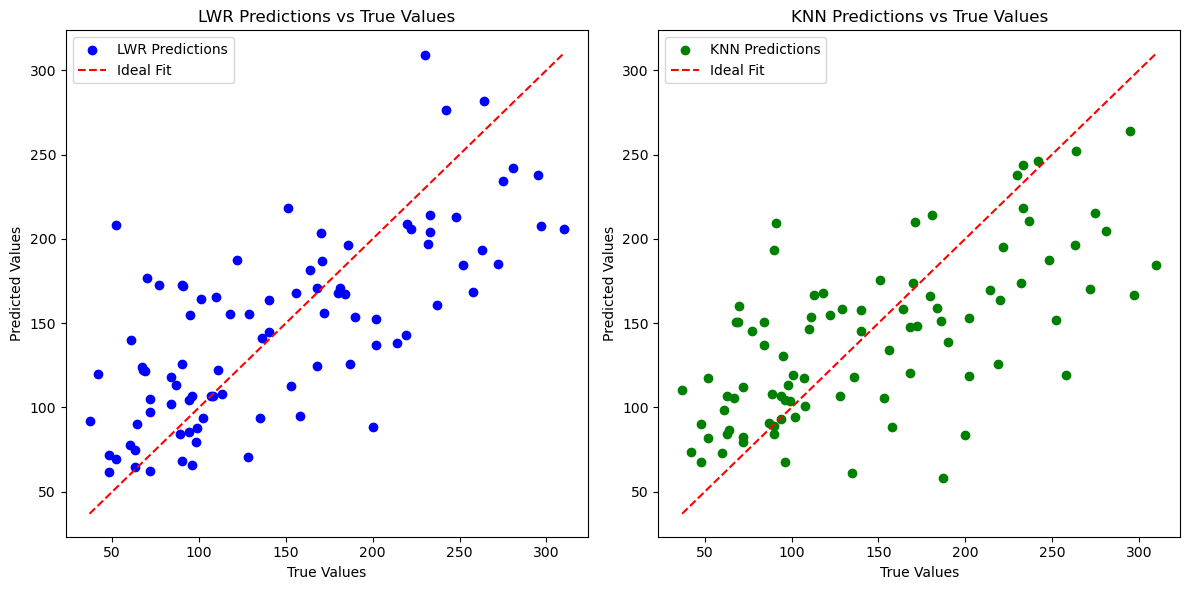

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Locally Weighted Regression for multiple features
def locally_weighted_regression(X, Y, tau, x_query):
    # Compute weights as a 1D array
    weights = np.exp(-np.sum((X - x_query)**2, axis=1) / (2 * tau**2))
    
    # Add intercept term to X
    X_augmented = np.c_[np.ones(X.shape[0]), X]
    x_query_augmented = np.r_[1, x_query]
    
    # Compute weighted normal equation
    W = np.diag(weights)  # Create a diagonal matrix for weights
    X_transpose_W = X_augmented.T @ W
    theta = np.linalg.pinv(X_transpose_W @ X_augmented) @ X_transpose_W @ Y
    return x_query_augmented @ theta

# Load the Diabetes dataset
diabetes = load_diabetes()
X_diabetes = diabetes.data  # Features
Y_diabetes = diabetes.target  # Target

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_diabetes, Y_diabetes, test_size=0.2, random_state=42)

# Predict using Locally Weighted Regression (LWR)
tau = 0.1  # Bandwidth parameter
predictions_lwr = []
for x_query in X_test:
    y_query = locally_weighted_regression(X_train, Y_train, tau, x_query)
    predictions_lwr.append(y_query)

# Evaluate LWR
mse_lwr = mean_squared_error(Y_test, predictions_lwr)
print(f"LWR Mean Squared Error on Diabetes Dataset: {mse_lwr}")

# Predict using KNN Regression
knn = KNeighborsRegressor(n_neighbors=5)  # Using 5 neighbors
knn.fit(X_train, Y_train)
predictions_knn = knn.predict(X_test)

# Evaluate KNN
mse_knn = mean_squared_error(Y_test, predictions_knn)
print(f"KNN Mean Squared Error on Diabetes Dataset: {mse_knn}")

# Compare Results
print(f"Comparison of MSE: LWR = {mse_lwr}, KNN = {mse_knn}")

# Visualization (Optional)
# Plot the true vs predicted values for both methods
plt.figure(figsize=(12, 6))

# LWR Predictions
plt.subplot(1, 2, 1)
plt.scatter(Y_test, predictions_lwr, color='blue', label='LWR Predictions')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('LWR Predictions vs True Values')
plt.legend()

# KNN Predictions
plt.subplot(1, 2, 2)
plt.scatter(Y_test, predictions_knn, color='green', label='KNN Predictions')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('KNN Predictions vs True Values')
plt.legend()

plt.tight_layout()
plt.show()